In [73]:
import pandas as pd
import seaborn as sns

### LOADING DATA

In [39]:
summ_df = pd.read_csv(r'data/news_summary.zip', encoding="ISO-8859-1")
print(f'There are {summ_df.shape[0]} rows and {summ_df.shape[1]} columns in data set-1')

There are 4514 rows and 6 columns in data set-1


In [57]:
summ_df.head()

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [42]:
summ_more_df = pd.read_csv(r'data/news_summary_more.zip', encoding="ISO-8859-1")
print(f'There are {summ_more_df.shape[0]} rows and {summ_more_df.shape[1]} columns in data set-2')

There are 98401 rows and 2 columns in data set-2


In [45]:
summ_more_df.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [65]:
# renmaing the columns for better readability
summ_df.rename({'read_more':'url', 'text':'short_text', 'ctext':'full_text'}, inplace = True)
summ_more_df.rename({'text':'full_text'}, inplace=True)


In [69]:
summ_df.head()

author                                             Chhavi Tyagi
date                                       03 Aug 2017,Thursday
headlines     Daman & Diu revokes mandatory Rakshabandhan in...
url           http://www.hindustantimes.com/india-news/raksh...
short_text    The Administration of Union Territory Daman an...
full_text     The Daman and Diu administration on Wednesday ...
Name: 0, dtype: object

In [70]:
summ_more_df.head()

headlines    upGrad learner switches to career in ML & Al w...
text         Saurav Kant, an alumnus of upGrad and IIIT-B's...
Name: 0, dtype: object

In [63]:
summ_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 0 to 4513
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   author      4514 non-null   object
 1   date        4514 non-null   object
 2   headlines   4514 non-null   object
 3   url         4514 non-null   object
 4   short_text  4514 non-null   object
 5   full_text   4396 non-null   object
dtypes: object(6)
memory usage: 246.9+ KB


In [71]:
summ_more_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98401 entries, 0 to 98400
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  98401 non-null  object
 1   text       98401 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


<AxesSubplot:>

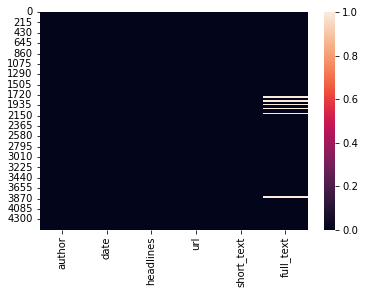

In [74]:
sns.heatmap(summ_df.isna()) # few NA values are present in full text column

<AxesSubplot:>

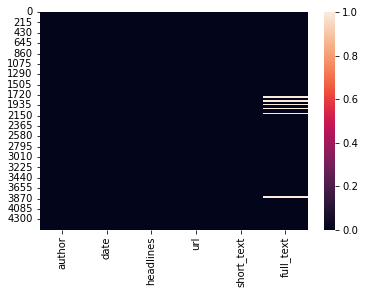

In [76]:
sns.heatmap(summ_df.isnull())  # few null values are present in full text column